# AI 中的数学 编程作业
2300012929 尹锦润

In [1]:
## Setup
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## 1. 概率密度变换实践

### (1)
假设:
- $u \sim U[-1, 1]$: 在 $[-1, 1]$ 上的均匀分布
- $\theta \sim \arccos(u)$
- $\phi \sim U[0, 2\pi]$: 在 $[0, 2\pi]$ 上的均匀分布

任务:
- 生成 5000 个独立同分布的 $u_i$, $\phi_i$
- 绘制点 $\phi_i = (\sin\theta_i\cos\phi_i, \sin\theta_i\sin\phi_i, \cos\theta_i)$ 的图像。

### (2)
- 从三维标准正态分布生成 5000 个独立样本 $x_i$
- 绘制 $x_i / \|x_i\|$ 的图像，与 (1) 进行对比。与（1）对比。

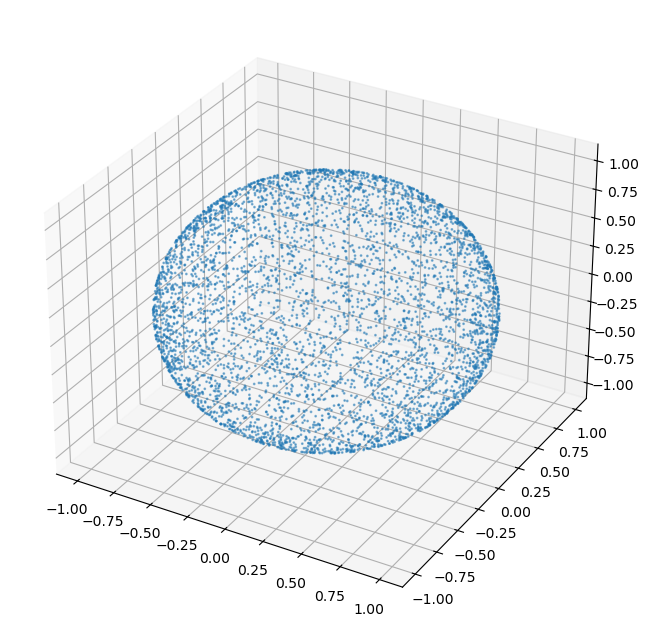

In [2]:
# 1
u = np.random.uniform(-1, 1, 5000)
phi = np.random.uniform(0, 2 * np.pi, 5000)

theta = np.arccos(u)
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=1, alpha=0.5)
plt.show()

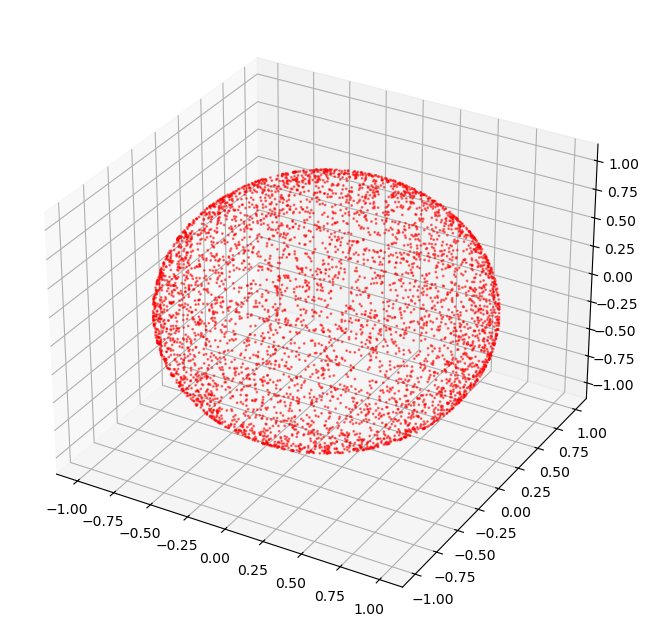

In [3]:
samples = np.random.normal(0, 1, (5000, 3))
samples = samples / np.linalg.norm(samples, axis=1, keepdims=True)

x_norm = samples[:, 0]
y_norm = samples[:, 1]
z_norm = samples[:, 2]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_norm, y_norm, z_norm, s=1, alpha=0.5, color='red')
plt.show()

## 2. 大数律与中心极限定理验证

对于均匀分布 $U[-1, 1]$、指数分布 $\lambda = 1$ 和标准正态分布，分别进行如下实验：

任务:
1. 样本量 $n = 1, 5, 100$，重复以下实验 10000 次：
    - 生成样本 $x_1, \dots, x_n$
    - 计算样本均值 $\bar{x}_n$
    - 标准化样本均值:
      $$
      z = \sqrt{n} \frac{\bar{x}_n - \mathbb{E}(x)}{\sqrt{\text{Var}(x)}}
      $$
2. 绘制标准化样本均值 $z$ 的直方图，并与标准正态分布对比，验证中心极限定理。

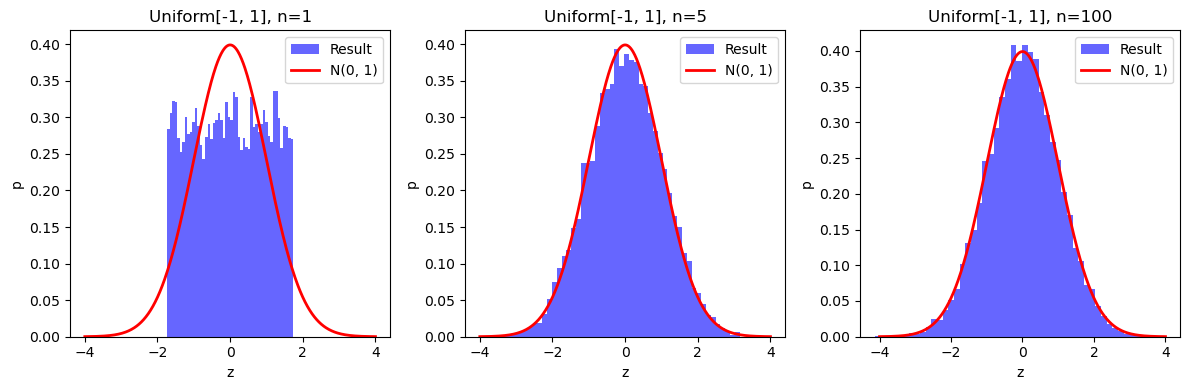

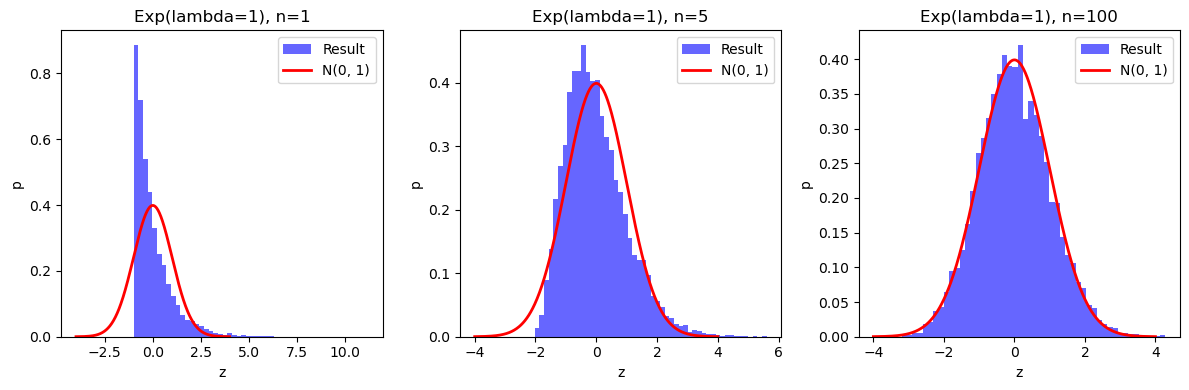

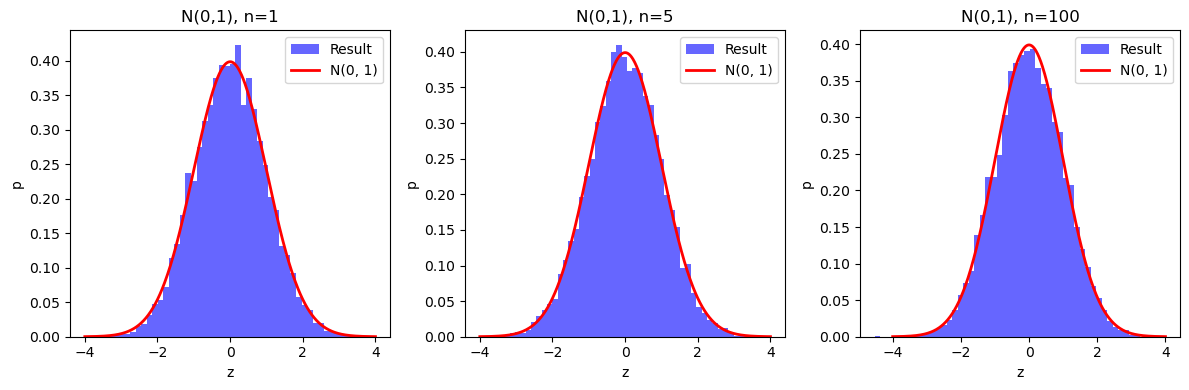

In [4]:
dist = {
    "Uniform[-1, 1]": {"func": lambda n: np.random.uniform(-1, 1, n), "mean": 0, "var": 1/3},
    "Exp(lambda=1)": {"func": lambda n: np.random.exponential(1, n), "mean": 1, "var": 1},
    "N(0,1)": {"func": lambda n: np.random.normal(0, 1, n), "mean": 0, "var": 1},
}
n_values = [1, 5, 100]
num_experiments = 10000

for name, params in dist.items():
    plt.figure(figsize=(12, 4))
    for i, n in enumerate(n_values):
        samples = params["func"]((num_experiments, n))
        sample_means = samples.mean(axis=1)
        
        z = np.sqrt(n) * (sample_means - params["mean"]) / np.sqrt(params["var"])
        
        plt.subplot(1, 3, i + 1)
        plt.hist(z, bins=50, density=True, alpha=0.6, color="blue", label="Result")
        x = np.linspace(-4, 4, 500)
        plt.plot(x, norm.pdf(x), 'r-', lw=2, label="N(0, 1)")
        plt.title(f"{name}, n={n}")
        plt.xlabel("z")
        plt.ylabel("p")
        plt.legend()

    plt.tight_layout()
    plt.show()


可以看见，对于三种不同的分布，在 $n \to \infty$ 时候，$N(0, 1)$ 越发符合分布密度，符合中心极限定理。

## 3. 线性回归实践

线性回归模型:
$$
y = x^\top w + \epsilon,\quad w = [2, 1]^\top,\quad x_1 \sim N(0, I_1),\quad x_2 = 1,\quad \epsilon \sim N(0, 1)
$$

### (1)
生成 100 对协变量 $x$ 和对应的响应变量 $y$。

### (2)
使用最小二乘法求参数 $\hat{w}$ 的估计量，并绘制拟合数据的图像。

### (3)
重复步骤 (1) 和 (2) 共 1000 次，记录每次估计得到的 $\hat{w}$，比较这些估计值 $\hat{w}_1$ 的直方图与其渐近分布:
  $$
  N\left(0, \frac{1}{100}I_1\right)
  $$
  进行比较。

### (4)
对 $n = 10000$ 的情况重复相同的步骤，$\hat{w}_1$ 的渐近分布是否提供了更好的拟合？


w_hat (n=100): [2.10342082 1.00626326]


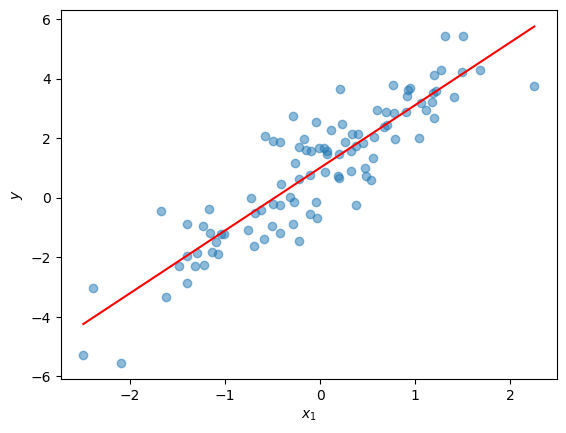

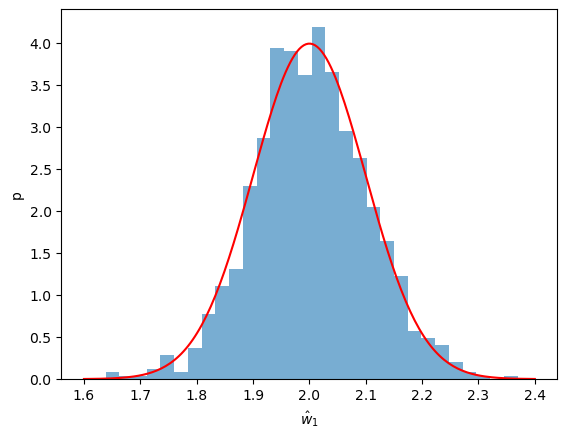

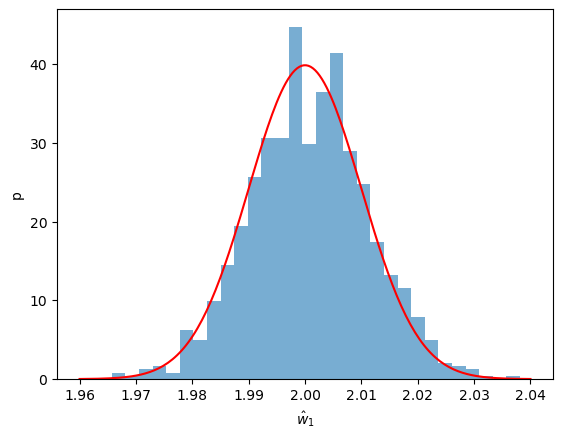

In [5]:
true_w = np.array([2, 1])
n1, n2 = 100, 10000


def generate(n, true_w):
    x1 = np.random.normal(0, 1, size=(n, 1))
    x2 = np.ones((n, 1))
    x = np.hstack([x1, x2])
    y = x @ true_w + np.random.normal(0, 1, size=n)
    return x, y


def get_w(x, y):
    return np.linalg.inv(x.T @ x) @ x.T @ y


def sim(n, true_w, simulations=1000):
    w_hats = []
    for _ in range(simulations):
        x, y = generate(n, true_w)
        w_hat = get_w(x, y)
        w_hats.append(w_hat)
    return np.array(w_hats)

x, y = generate(n1, true_w)
w_hat = get_w(x, y)
print(f"w_hat (n={n1}): {w_hat}")
plt.scatter(x[:, 0], y, alpha=0.5)
x_line = np.linspace(min(x[:, 0]), max(x[:, 0]), 100)
plt.plot(x_line, w_hat[0] * x_line + w_hat[1], color="red")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.show()

w_hats_100 = sim(n1, true_w, simulations=1000)
w1_hats_100 = w_hats_100[:, 0]
mean, std = 2, np.sqrt(1 / n1)
x = np.linspace(mean - 4 * std, mean + 4 * std, 200)
plt.hist(w1_hats_100, bins=30, density=True, alpha=0.6)
plt.plot(x, (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2), color="red")
plt.xlabel("$\\hat{w}_1$")
plt.ylabel("p")
plt.show()

w_hats_10000 = sim(n2, true_w, simulations=1000)
w1_hats_10000 = w_hats_10000[:, 0]
mean, std = 2, np.sqrt(1 / n2)
x = np.linspace(mean - 4 * std, mean + 4 * std, 200)
plt.hist(w1_hats_10000, bins=30, density=True, alpha=0.6)
plt.plot(x, (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2), color="red")
plt.xlabel("$\\hat{w}_1$")
plt.ylabel("p")
plt.show()

样本量大的时候 $\hat w_1$ 更加符合理论分布。

## 4. 机器学习实际问题实践

使用线性回归在 MNIST 数据集上进行手写数字分类。

任务:
1. 加载 MNIST 数据集，仅选择两个数字进行二分类，例如“0”和“1”。
2. 将图像数据从二维（28x28）展平成一维（784 维）。
3. 将像素值标准化到 $[0, 1]$ 区间，以提高模型训练效率。
4. 将标签转换为数值格式（0 和 1）。
5. 随机划分训练集与测试集（80% 用于训练）。
6. 使用训练集训练线性回归模型。
7. 使用训练好的模型对测试集进行预测，得到连续的预测值。
8. 将连续值通过设定阈值（如 0.5）转换为类别标签（0 或 1）。
9. 比较预测标签与真实标签，计算分类准确率。

**提示**:
- 可以使用 `tensorflow.keras.datasets.mnist` 或 `torchvision.datasets.MNIST` 加载数据集。
- 或者从官网寻找数据集。

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def filter_01(x, y):
    mask = (y == 0) | (y == 1)
    return x[mask], y[mask]

x_train, y_train = filter_01(x_train, y_train)
x_test, y_test = filter_01(x_test, y_test)

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

x_train = x_train / 255.0
x_test = x_test / 255.0

x_data = np.vstack([x_train, x_test])
y_data = np.hstack([y_train, y_test])
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred_prob = model.predict_proba(x_test)[:, 1]
y_pred = (y_pred_prob >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9997


## 5. 谱图理论实践

### (1)
对于五十阶完全图 $K_{50}$ 和环形图 $C_{50}$，计算：
- 邻接矩阵
- 拉普拉斯矩阵
- 拉普拉斯矩阵的特征值

### (2)
对五十阶图的第 $i$ 个顶点赋值为 $v_i^0 = x_i$，其中 $x$ 服从 50 维标准正态分布。

执行迭代平均过程:
- 每个顶点在每一步迭代中将其当前值更新为自身与所有相邻顶点值的平均值。

任务:
- 比较完全图 $K_{50}$ 与环形图 $C_{50}$ 的迭代平均过程满足：
  $$
  \sum_{i=1}^{50} |v_i^t - v_i^{t-1}| \leq 10^{-6}
  $$
  所需要的迭代步数 $t$。

### (3)
重复 30 次实验，在平均意义下比较两种图的收敛速度。

In [ ]:
n = 50

adjacency_k50 = np.ones((n, n)) - np.eye(n)
# 完全图的拉普拉斯矩阵
laplacian_k50 = np.diag(np.sum(adjacency_k50, axis=1)) - adjacency_k50
# 拉普拉斯矩阵特征值
laplacian_eigenvalues_k50 = np.linalg.eigvalsh(laplacian_k50)

adjacency_c50 = np.zeros((n, n))
for i in range(n):
    adjacency_c50[i, (i + n - 1) % n] = 1
    adjacency_c50[i, (i + 1) % n] = 1
laplacian_c50 = np.diag(np.sum(adjacency_c50, axis=1)) - adjacency_c50
laplacian_eigenvalues_c50 = np.linalg.eigvalsh(laplacian_c50)


print("完全图 K_50 的邻接矩阵:", adjacency_k50)
print("环形图 C_50 的邻接矩阵:", adjacency_c50)
print("完全图 K_50 的拉普拉斯矩阵:", laplacian_k50)
print("环形图 C_50 的拉普拉斯矩阵:", laplacian_c50)
print("完全图 K_50 的拉普拉斯矩阵特征值:", laplacian_eigenvalues_k50)
print("环形图 C_50 的拉普拉斯矩阵特征值:", laplacian_eigenvalues_c50)
def iter_steps(A, x, tol=1e-6):
    n = len(x)
    v = x.copy()
    t = 0
    while True:
        v_new = np.zeros(n)
        for i in range(n):
            neigh = np.where(A[i] == 1)[0]
            neigh = np.append(neigh, i)
            v_new[i] = np.mean(v[neigh])
        if np.sum(np.abs(v_new - v)) <= tol:
            break
        v = v_new
        t += 1
    return t

# 初始化顶点值
x = np.random.normal(0, 1, n)

steps_k50 = iter_steps(adjacency_k50, x)
print("完全图 K_50 达到收敛所需的迭代步数:", steps_k50)
steps_c50 = iter_steps(adjacency_c50, x)

print("环形图 C_50 达到收敛所需的迭代步数:", steps_c50)

def experiment_repetitions(graph_type, repetitions=30):
    steps = []
    for _ in range(repetitions):
        x = np.random.normal(0, 1, n)
        if graph_type == 'K50':
            steps.append(iter_steps(adjacency_k50, x))
        elif graph_type == 'C50':
            steps.append(iter_steps(adjacency_c50, x))
    return np.mean(steps)

avg_steps_k50 = experiment_repetitions('K50')
print("完全图 K_50 平均收敛步数:", avg_steps_k50)
avg_steps_c50 = experiment_repetitions('C50')
print("环形图 C_50 平均收敛步数:", avg_steps_c50)


完全图 K_50 的邻接矩阵: [[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
环形图 C_50 的邻接矩阵: [[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]]
完全图 K_50 的拉普拉斯矩阵: [[49. -1. -1. ... -1. -1. -1.]
 [-1. 49. -1. ... -1. -1. -1.]
 [-1. -1. 49. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... 49. -1. -1.]
 [-1. -1. -1. ... -1. 49. -1.]
 [-1. -1. -1. ... -1. -1. 49.]]
环形图 C_50 的拉普拉斯矩阵: [[ 2. -1.  0. ...  0.  0. -1.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [-1.  0.  0. ...  0. -1.  2.]]
完全图 K_50 的拉普拉斯矩阵特征值: [8.52651283e-14 5.00000000e+01 5.00000000e+01 5.00000000e+01
 5.00000000e+01 5.00000000e+01 5.00000000e+01 5.00000000e+01
 5.00000000e+01 5.00000000e+01 5.00000000e+01 5.00000000e+01
 5.00000000e+01 5.00000000e+01 5

## 6. 规律探索

 假如一个矩阵是随机的，那么随着矩阵规模扩大，特征值分布是否会出现规律？

### Wigner 半圆定律
- 描述了大规模对称随机矩阵特征值的分布规律。
- $M \in \mathbb{R}^{d \times d}$ 为 Wigner 矩阵，满足：
  1. $M = M^\top$，且对于 $1 \leq i \leq j \leq d$，$M_{ij}$ 相互独立。
  2. 对于 $1 \leq i < j \leq d$: $M_{ij} \overset{i.i.d}{\sim} y$, 满足 $\mathbb{E}(y) = 0, \text{Var}(y) = 1$。
  3. 对于 $1 \leq i \leq d$: $M_{ii} \overset{i.i.d}{\sim} z$, 满足 $\mathbb{E}(z) = 0, \text{Var}(z) < \infty$。

**Wigner 半圆分布**:
$$
p(x) = \frac{1}{2\pi}\sqrt{4 - x^2}, \quad |x| \leq 2
$$

### (1)
生成一个 $\mathbb{R}^{1000 \times 1000}$ 的 Wigner 矩阵：
- 每个元素服从标准正态分布（上半矩阵元素独立生成，下半部分对称）。
- 绘制特征值直方图，并与 Wigner 半圆分布对比。

### (2)
将矩阵元素改为以 0 为中心的均匀分布，重复上述分析。


In [ ]:
def generate_wigner_matrix(d, dist='normal'):
    if dist == 'normal':
        matrix = np.random.normal(0, 1, (d, d))
        # diag = np.random.normal(0, 1, size=d)
    elif dist == 'uniform':
        matrix = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=(d, d))
        # diag = np.random.normal(0, 1, size=d)
    
    matrix = (matrix + matrix.T) / np.sqrt(2 * d) # normalize
    # np.fill_diagonal(matrix, diag)
    return matrix

def wigner_distribution(x):
    return (1 / (2 * np.pi)) * np.sqrt(4 - x**2)

def plot(matrix, title):
    eigen = np.linalg.eigvalsh(matrix) 
    plt.hist(eigen, bins=100, density=True, alpha=0.75, label="eigenvalues")

    x = np.linspace(-2, 2, 500)
    y = wigner_distribution(x)
    plt.plot(x, y, 'r-', label='Wigner Semicircle', linewidth=2)
    
    plt.title(title)
    plt.xlabel("Eigenvalue")
    plt.ylabel("p")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
    
d = 1000
matrix_normal = generate_wigner_matrix(d, dist='normal')
plot(matrix_normal, title="1(Normal)")

matrix_uniform = generate_wigner_matrix(d, dist='uniform')
plot(matrix_uniform, title="2(Uniform)")


注意有一个 $/ \sqrt{2}$ 是因为相加之后方差归一。